<a href="https://colab.research.google.com/github/dhyey510/DS_PR12/blob/main/DS_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet


data=pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
1,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300
2,2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
3,2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
4,2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100


# Visualising CLOSE column

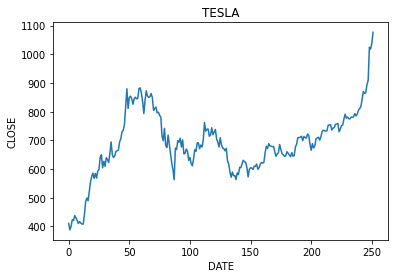

In [2]:
close=data['Close']
ax=close.plot(title="TESLA")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

# Getting the data ready

In [3]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

In [4]:
data=data.rename(columns={"Date":"ds","Close":"y"})

## Predicting the Test set

In [5]:
model=Prophet.Prophet()
model.fit(data)
predict=model.make_future_dataframe(periods=365)
forcast=model.predict(predict)

forcast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-10-24,1806.215246,877.638915,2792.409167
613,2022-10-25,1812.153612,875.217000,2815.115972
614,2022-10-26,1813.503560,858.307767,2799.142013
615,2022-10-27,1817.097860,864.690872,2823.471852
616,2022-10-28,1817.903998,868.069400,2821.635849


# Visualising the predicted model on Graph

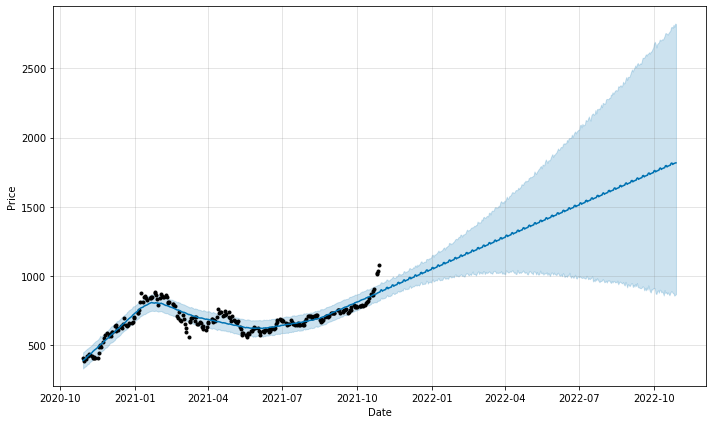

In [6]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")